In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [4]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','coat'
            , 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

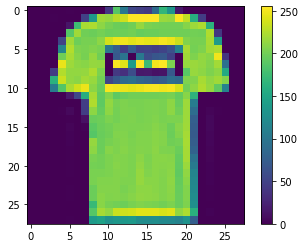

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

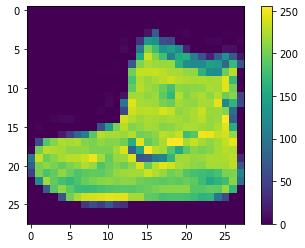

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images=train_images/255.0
test_images=test_images/255.0

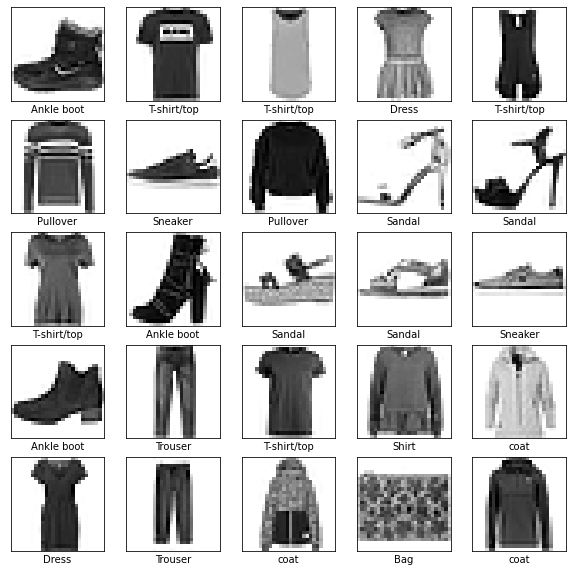

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()
    

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)    
])

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4992 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3354 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3117 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2930 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2541 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2457 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

In [17]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test accuracy",test_acc)

313/313 [==============================] - 0s 894us/step - loss: 0.3714 - accuracy: 0.8714
Test accuracy 0.871399998664856


In [18]:
predictions=model.predict(test_images)

In [19]:
predictions[0]

array([1.8793991e-05, 1.8700199e-09, 3.6176233e-09, 1.1295972e-10,
       1.5286096e-07, 2.0975320e-02, 2.1722443e-07, 5.0467227e-02,
       2.4966268e-06, 9.2853582e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
 def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
        
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
    

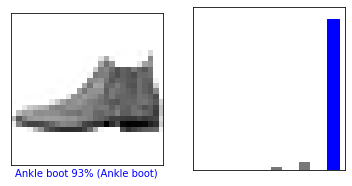

In [23]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

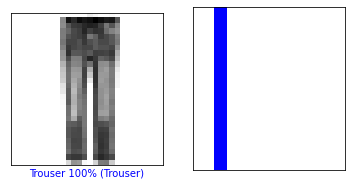

In [24]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

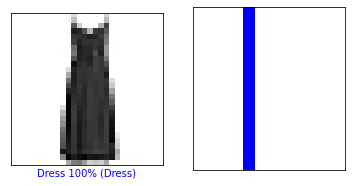

In [25]:
i=13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

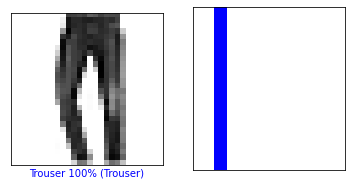

In [26]:
i=5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

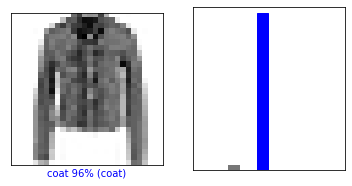

In [27]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

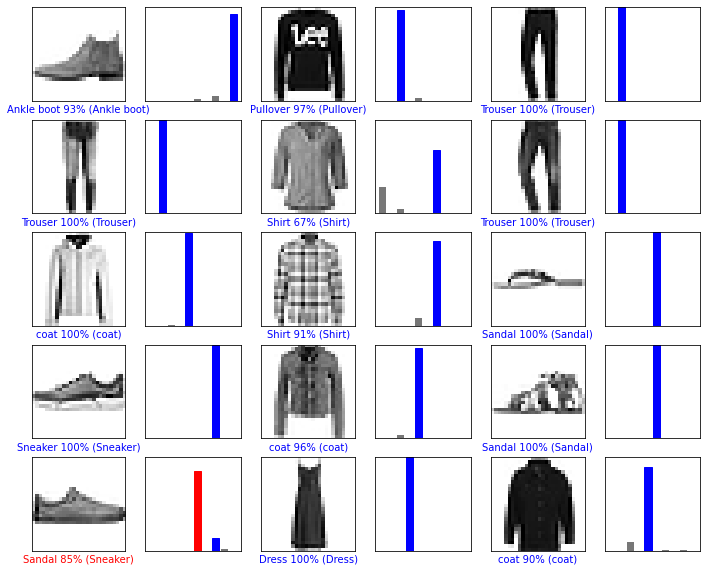

In [28]:
rows=5
cols=3
images=rows*cols
plt.figure(figsize=(2*2*cols,2*rows))
for i in range(images):
    plt.subplot(rows,2*cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(rows,2*cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()    
    

In [29]:
img=test_images[0]
print(img.shape)

(28, 28)


In [30]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single=model.predict(img)
print(predictions_single)

[[1.8793959e-05 1.8700166e-09 3.6176169e-09 1.1295951e-10 1.5286054e-07
  2.0975277e-02 2.1722383e-07 5.0467122e-02 2.4966225e-06 9.2853594e-01]]


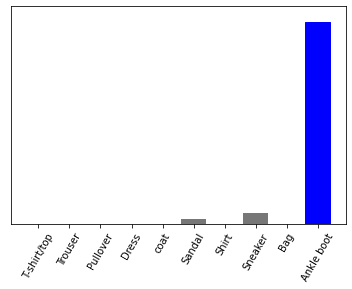

In [32]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=60)

In [33]:
np.argmax(predictions_single[0])

9